<a href="https://colab.research.google.com/github/MinHyeok-lee1/AICamera/blob/master/2022_01_20_1_Mk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 1. 필요한 라이브러리 다운로드
# Ignore the warnings
# 버전이 바뀌었을때 발생할 수 있는 오류들을 경고해주는 메시지
import warnings
#warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# System related and data input controls
import os

# Data manipulation and visualization
import pandas as pd
pd.options.display.float_format = '{:,.2f}'.format
pd.options.display.max_rows = 10
pd.options.display.max_columns = 20
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Modeling algorithms
# General
import statsmodels.api as sm
from scipy import stats

# Model selection
from sklearn.model_selection import train_test_split

# Evaluation metrics
# for regression
from sklearn.metrics import mean_squared_log_error, mean_squared_error,  r2_score, mean_absolute_error

In [2]:
location = '/content/drive/MyDrive/Colab Notebooks/lowdata.xlsx'
df = pd.read_excel(location, sheet_name=3, skiprows=1)

for i in range(df.일자.size):
  df.일자[i] = df.일자[i][0:10]

df = df[df['품목코드'] != 'MKP000']
df

,일자,판매년,판매월,품목코드,품명 및 규격,수량,단가,공급가액,부가세,합 계,거래처코드,판매처명,거래처계층그룹명,창고명,적요(세금계산서)
0,2020/01/02,2020,1,700,CARGLE P(20L) [20L용기(말통)/1~4개 이용],1,"34,545.00","34,545.00","3,455.00","38,000.00",1240326855,[수원][키포스]개벽카센터,수원카포스,본사,택배배송
1,2020/01/02,2020,1,702,CARGLE P(20L) [20L용기(말통)/10개이상 이용],1,"31,818.00","31,818.00","3,182.00","35,000.00",1300124746,[경기][공임나라]부천고강점(나드리세차장),인천대리점소속,본사,택배배송
2,2020/01/02,2020,1,700,CARGLE P(20L) [20L용기(말통)/1~4개 이용],1,"34,545.00","34,545.00","3,455.00","38,000.00",3296900193,[부천][카포스]중앙자동차전문정비,부천카포스ㆍ인천대리점소속,본사,택배배송
3,2020/01/02,2020,1,700,CARGLE P(20L) [20L용기(말통)/1~4개 이용],1,"35,454.00","35,454.00","3,546.00","39,000.00",1310650072,[인천][카포스]골드자동차공업사,인천남동구ㆍ인천대리점소속ㆍ인천카포스,본사,택배배송
4,2020/01/02,2020,1,700,CARGLE P(20L) [20L용기(말통)/1~4개 이용],1,"35,454.00","35,455.00","3,545.00","39,000.00",1313511012,[인천][카포스][스피트메이트]구월점,인천남동구ㆍ인천대리점소속ㆍ인천카포스,본사,택배배송
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3569,2021/12/29,2021,12,704,CARGLE P(20L) [20L용기(말통)/파렛트],35,"27,273.00","954,545.00","95,455.00","1,050,000.00",4130492816,[대리점]엠케이 충남총판(비앤비오토모티브),대리점,본사,NaN
3570,2021/12/29,2021,12,702,CARGLE P(20L) [20L용기(말통)/10개이상 이용],10,"37,273.00","372,727.00","37,273.00","410,000.00",5020615544,[대구광역시][기아오토큐]신암점,NaN,로젠(부강),NaN
3571,2021/12/30,2021,12,700,CARGLE P(20L) [20L용기(말통)/1~4개 이용],2,"37,273.00","74,545.00","7,455.00","82,000.00",5571900852,#부산 영진모터스,NaN,부산대리점 임시,NaN
3572,2021/12/30,2021,12,701,CARGLE P(20L) [20L용기(말통)/5~9개 이용],6,"37,273.00","223,636.00","22,364.00","246,000.00",6100437772,#울산 호계남부점현대자동차,NaN,부산대리점 임시,NaN


In [3]:
df['일자'] =  pd.to_datetime(df['일자'])
df = df.set_index('일자')
df['수량']=df['수량'].astype(int)

In [4]:
split = "2021-01-01"
df1= df.loc[:split]
df2= df.loc[split:]
train1 = df1.reset_index()
train2 = df2.reset_index()

In [5]:
train1.describe()

,판매년,판매월,수량,단가,공급가액,부가세,합 계
count,"1,948.00","1,948.00","1,948.00","1,938.00","1,938.00","1,938.00","1,938.00"
mean,"2,020.00",5.90,4.47,"36,440.67","149,943.27","14,994.82","164,938.08"
std,0.00,3.64,7.17,"3,890.67","207,989.29","20,801.19","228,790.48"
min,"2,020.00",1.00,-10.00,"15,636.00","-427,273.00","-42,727.00","-470,000.00"
25%,"2,020.00",2.00,2.00,"34,545.00","69,090.00","6,909.00","76,000.00"
50%,"2,020.00",6.00,2.00,"35,455.00","85,455.00","8,545.00","94,000.00"
75%,"2,020.00",9.00,5.00,"37,273.00","172,727.00","17,275.00","190,000.00"
max,"2,020.00",12.00,51.00,"42,727.00","1,527,273.00","152,727.00","1,680,000.00"


In [6]:
train2.describe()

,판매년,판매월,수량,단가,공급가액,부가세,합 계
count,"1,522.00","1,522.00","1,522.00","1,486.00","1,486.00","1,486.00","1,486.00"
mean,"2,021.00",6.59,8.12,"36,467.97","261,672.18","26,167.23","287,839.41"
std,0.00,3.70,17.61,"4,074.05","497,882.24","49,788.16","547,670.41"
min,"2,021.00",1.00,-96.00,"14,545.00","-2,618,182.00","-261,818.00","-2,880,000.00"
25%,"2,021.00",3.00,2.00,"34,545.00","74,545.00","7,455.00","82,000.00"
50%,"2,021.00",6.00,3.00,"37,273.00","111,818.00","11,182.00","123,000.00"
75%,"2,021.00",10.00,5.00,"37,273.00","207,273.00","20,727.00","228,000.00"
max,"2,021.00",12.00,192.00,"42,727.00","5,585,455.00","558,545.00","6,144,000.00"


In [7]:
print('2020: ', train1[train1['품목코드'] == '700'].품목코드.size, ", " ,
      train1[train1['품목코드'] == '701'].품목코드.size, ", " ,
      train1[train1['품목코드'] == '702'].품목코드.size, ", " ,
      train1[train1['품목코드'] == '703'].품목코드.size)

print('2021: ',train2[train2['품목코드'] == '700'].품목코드.size, ", " ,
      train2[train2['품목코드'] == '701'].품목코드.size, ", " ,
      train2[train2['품목코드'] == '702'].품목코드.size, ", " ,
      train2[train2['품목코드'] == '703'].품목코드.size, ", " ,
      train2[train2['품목코드'] == '704'].품목코드.size)

2020:  1298 ,  256 ,  391 ,  3
2021:  919 ,  218 ,  272 ,  30 ,  83


In [8]:
print('2020: ', train1[train1['수량'] == -1].수량.size, ", " ,
      train1[train1['수량'] == -2].수량.size, ", " ,
      train1[train1['수량'] == -3].수량.size, ", " ,
      train1[train1['수량'] == -4].수량.size, ", " ,
      train1[train1['수량'] == -5].수량.size, ", " ,
      train1[train1['수량'] == -10].수량.size)

2020:  3 ,  3 ,  1 ,  1 ,  2 ,  2


In [9]:
print('2021: ', train2[train2['수량'] == -2].수량.size, ", " ,
      train2[train2['수량'] == -3].수량.size, ", " ,
      train2[train2['수량'] == -6].수량.size, ", " ,
      train2[train2['수량'] == -10].수량.size, ", " ,
      train2[train2['수량'] == -20].수량.size, ", " ,
      train2[train2['수량'] == -96].수량.size)

2021:  3 ,  3 ,  1 ,  3 ,  1 ,  1


In [10]:
train2['수량'].unique()

array([  7,  10,   1,   2,   5,   3,   4,  48,  -3,   8,  49,   6,  32,
        20, 144,  96, 192,  -2,  25, -10,  30, -20,  18,  12, -96,  40,
         9,  14,  -6,  13,  35])

In [ ]:
for i in range(train1.수량.unique().size) :
  print('2020년 거래갯수 당 거래량', train1['수량'].unique()[i],'개 거래횟수: ',
         train1[train1['수량'] == train1['수량'].unique()[i]].수량.size)
  
for i in range(train2.수량.unique().size) :
  print('2021년 거래갯수 당 거래량', train2['수량'].unique()[i],'개 거래횟수: ',
         train2[train2['수량'] == train2['수량'].unique()[i]].수량.size)

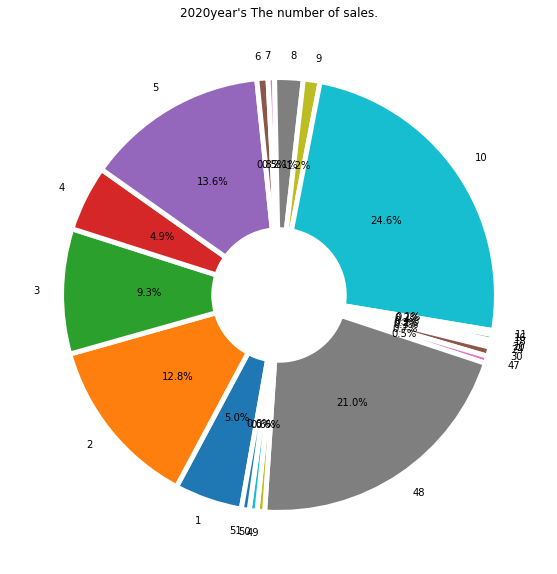

In [151]:
# 거래갯수
ratio1 = [438*1, 557*2, 270*3, 106*4, 236*5,
          12*6, 6*7, 23*8, 12*9, 214*10,
          1*11, 1*16, 2*18, 1*20, 1*24,
          2*30, 1*47, 38*48, 1*49, 1*50, 1*51]
# 441 - 3, 560 - 3, 271 -1, 107-1, 238-2, 216-2
labels1 = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10',
           '11', '16', '18', '20', '24', '30', '47', '48', '49',
           '50', '51']

plt.figure(figsize=(10,10)) 
plt.title('2020year\'s The number of sales.')
plt.pie(ratio1, labels=labels1, autopct='%.1f%%', startangle=260, counterclock=False, wedgeprops=wedgeprops)
plt.show()

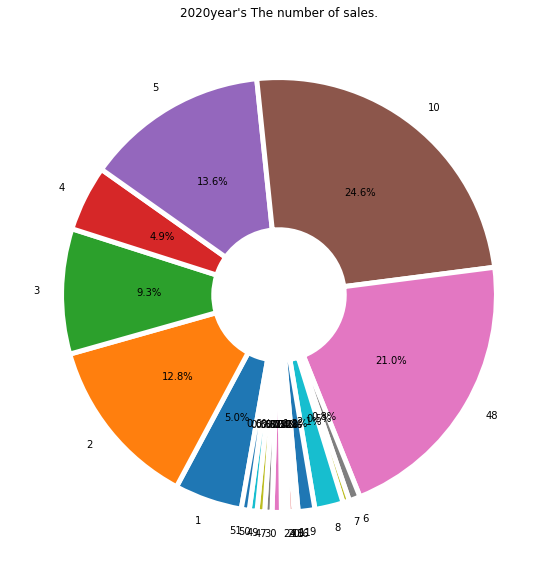

In [152]:
ratio1_1 = [438*1, 557*2, 270*3, 106*4, 236*5, 214*10, 38*48,
          12*6, 6*7, 23*8, 12*9,
          1*11, 1*16, 2*18, 1*20, 1*24,
          2*30, 1*47, 1*49, 1*50, 1*51]
# 441 - 3, 560 - 3, 271 -1, 107-1, 238-2, 216-2
labels1_1 = ['1', '2', '3', '4', '5', '10', '48',
           '6', '7', '8', '9',
           '11', '16', '18', '20', '24',
           '30', '47', '49', '50', '51']
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}

mean_sales_1 = int(np.mean(ratio1_1))

plt.figure(figsize=(10,10)) 
plt.title('2020year\'s The number of sales.')
plt.pie(ratio1_1, labels=labels1_1, autopct='%.1f%%', startangle=260, counterclock=False, wedgeprops=wedgeprops)
plt.show()

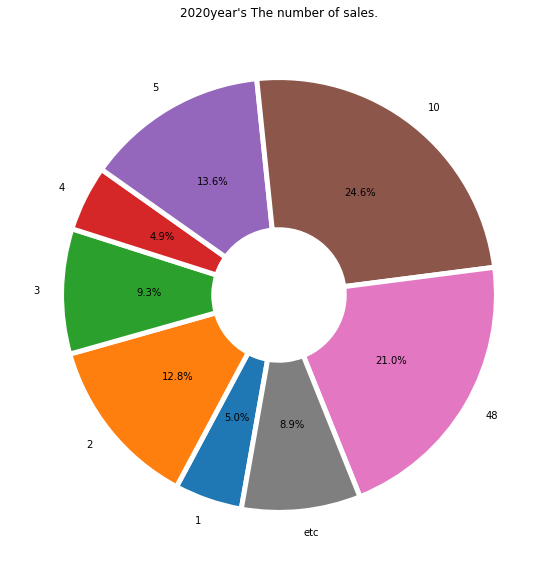

In [145]:
ratio1_p = [438*1, 557*2, 270*3, 106*4, 236*5, 214*10, 38*48,
          12*6 + 6*7 + 23*8 + 12*9 +
          1*11 + 1*16 + 2*18 + 1*20 + 1*24 +
          2*30 + 1*47 + 1*49 + 1*50 + 1*51]
# 441 - 3, 560 - 3, 271 -1, 107-1, 238-2, 216-2
labels1_p = ['1', '2', '3', '4', '5', '10', '48',
           'etc']
mean_sales_1p = int(np.mean(ratio1_p))
plt.figure(figsize=(10,10))
plt.title('2020year\'s The number of sales.')
plt.pie(ratio1_p, labels=labels1_p, autopct='%.1f%%', startangle=260, counterclock=False, wedgeprops=wedgeprops)
plt.show()

In [149]:
def draw_linegraph(x, y, mean, years):  
  fig = plt.figure(figsize=(10,10)) ## 캔버스 생성
  fig.set_facecolor('white') ## 캔버스 색상 설정
  ax = fig.add_subplot() ## 그림 뼈대(프레임) 생성
  args_plot = [x, y] ## 데이터 인자
  config_plot = dict( ## 키워드 인자
      color='red', # 선 색깔
      linestyle='solid', # 선 스타일
      linewidth=2, # 선 두께 
      marker='o', # 마커 모양
      markersize=10, # 마커 사이즈
      markeredgecolor='white', # 마커 테두리 색깔
      markeredgewidth=3, # 마커 테두리 두께
  )
  
  ax.plot(label='Sales', *args_plot,**config_plot) ## 선그래프 생성 - 범례라벨 추가
  
  ax.axhline(mean,label='Mean') ## 평균값을 y좌표로 하는 수평선 생성
  
  ylim = ax.get_ylim() ## 기존의 y축 범위를 저장
  
  ## 평균값을 y 눈금에 추가한다.
  yticks = list(ax.get_yticks())
  yticks.append(mean)
  yticks = sorted(yticks)
  # ax.text(0,mean+10,f'Mean of Sales : {mean}',fontsize=13) ## 평균 매출 텍스트 출력
 
  ax.set_yticks(yticks) ## 평균이 포함된 y눈금으로 새롭게 세팅한다.
  ax.set_ylim(ylim) ## 기존의 y축 범위를 유지
  
  ax.legend(loc='upper left', fontsize=15) ## 범례 생성
  
  plt.xticks(rotation=45) ## x축 눈금 라벨 설정 - 45도 회전 
  plt.title('%s year\'s The number of sales.' %years,fontsize=20) ## 타이틀 설정
  plt.show()

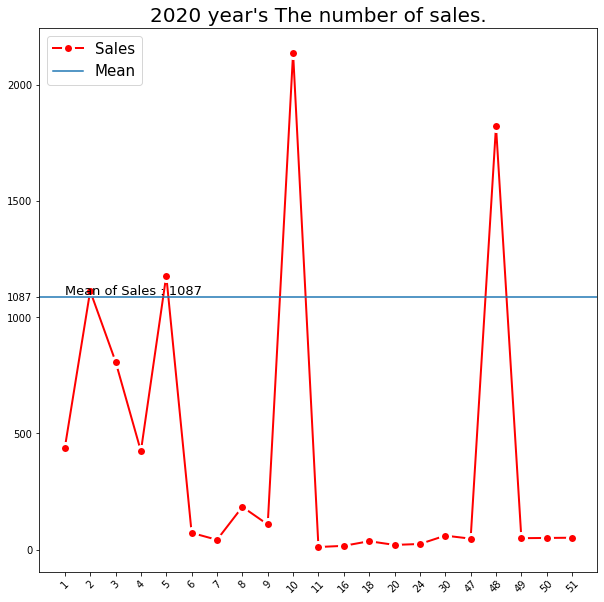

In [150]:
draw_linegraph(labels1, ratio1, mean_sales_1p, "2020")

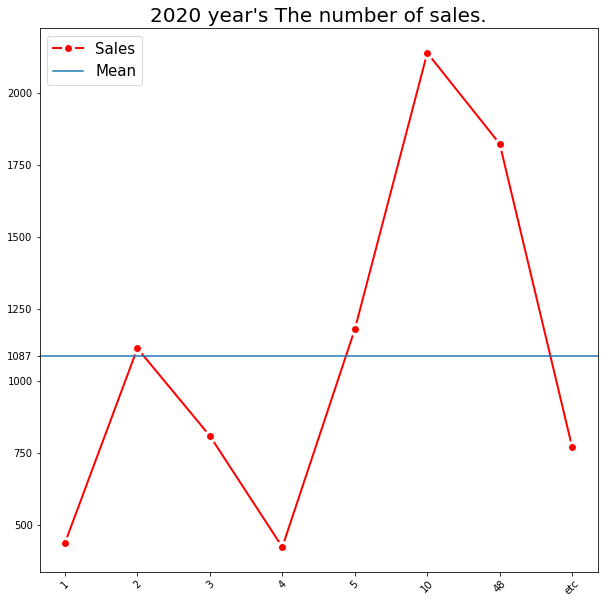

In [132]:
draw_linegraph(labels1_p, ratio1_p, mean_sales_1p, "2020")

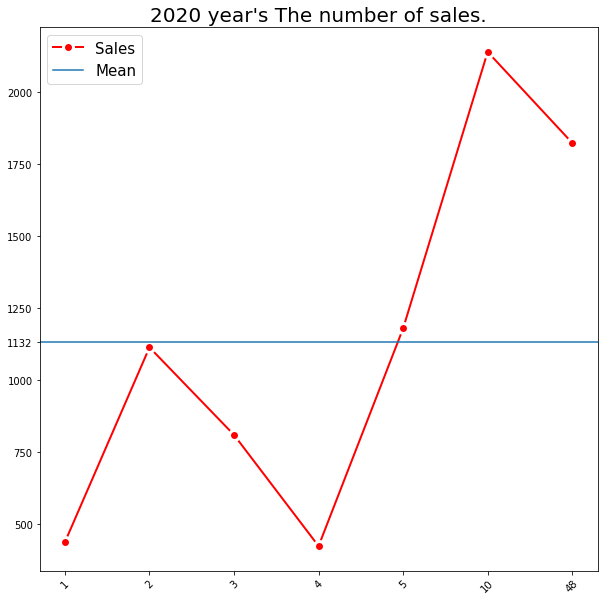

In [133]:
ratio1_p2 = [438*1, 557*2, 270*3, 106*4, 236*5, 214*10, 38*48]
# 441 - 3, 560 - 3, 271 -1, 107-1, 238-2, 216-2
labels1_p2 = ['1', '2', '3', '4', '5', '10', '48']
mean_sales_p = int(np.mean(ratio1_p2))           
draw_linegraph(labels1_p2, ratio1_p2, mean_sales_p, '2020')

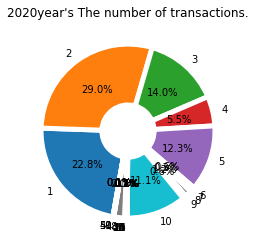

In [64]:
# 거래량
ratio1_n = [438, 557, 270, 106, 236,
          12, 6, 23, 12, 214,
          1, 1, 2, 1, 1,
          2, 1, 38, 1, 1, 1]
# 441 - 3, 560 - 3, 271 -1, 107-1, 238-2, 216-2
labels1_n = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10',
           '11', '16', '18', '20', '24', '30', '47', '48', '49',
           '50', '51']
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}

plt.figure(figsize=(10,10))
plt.title('2020year\'s The number of transactions.')
plt.pie(ratio1_n, labels=labels1_n, autopct='%.1f%%', startangle=260, counterclock=False, wedgeprops=wedgeprops)
plt.show()

Text(0, 0.5, 'Counts')

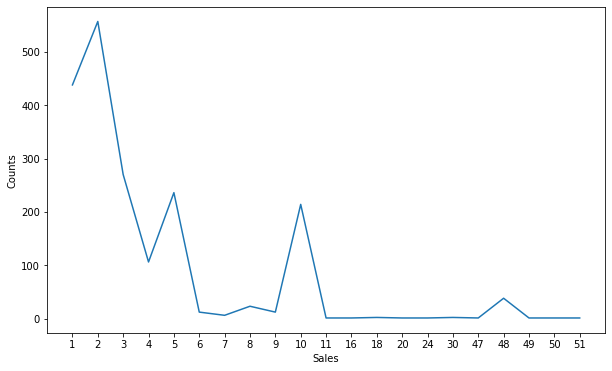

In [65]:
plt.figure(figsize=(10,6))
plt.plot(labels1_n , ratio1_n )
plt.xlabel('Sales')
plt.ylabel('Counts')

In [ ]:
ratio2 = [167*1, 401*2, 237*3, 107*4, 217*5, 26*6, 11*7, 2*8, 1*9, 206*10,
          2*12, 1*13, 1*14, 1*18, 14*20, 5*25, 5*30, 1*32, 2*35,
          2*40, 57*48, 1*49, 27*96, 2*144, 2*192]
#  404-3 ,  240-3 ,  27-1 ,  209-3 ,  15-1 ,  28-1
labels2 = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10',
           '12', '13', '14', '18', '20', '25', '30', '32', '35',
           '40', '48', '49', '96', '144', '192']
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}

plt.figure(figsize=(10,10))
plt.title('2021year\'s The number of transactions.')
plt.pie(ratio2, labels=labels2, autopct='%.1f%%', startangle=260, counterclock=False, wedgeprops=wedgeprops)
plt.show()

In [ ]:
ratio2_2 = [167*1, 401*2, 237*3, 107*4, 217*5, 206*10,  57*48 + 1*49 + 27*48*2 + 2*48*3 + 2*48*4, 
          26*6 + 11*7 + 2*8 + 1*9 + 2*12 + 1*13 + 1*14 + 1*18 + 14*20 + 5*25 + 5*30 + 1*32 + 2*35 + 2*40]
#  404-3 ,  240-3 ,  27-1 ,  209-3 ,  15-1 ,  28-1
labels2_2 = ['1', '2', '3', '4', '5', '10', 'upper 48', 'etc']
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}

plt.figure(figsize=(10,10))
plt.title('2021year\'s The number of transactions.')
plt.pie(ratio2_2, labels=labels2_2, autopct='%.1f%%', startangle=260, counterclock=False, wedgeprops=wedgeprops)
plt.show()

In [ ]:
ratio2_p = [167*1, 401*2, 237*3, 107*4, 217*5, 206*10,  57*48 + 1*49 + 27*48*2 + 2*48*3 + 2*48*4]
#  404-3 ,  240-3 ,  27-1 ,  209-3 ,  15-1 ,  28-1
labels2_p = ['1', '2', '3', '4', '5', '10', 'upper 48']
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}

plt.figure(figsize=(10,10))
plt.title('2021year\'s The number of transactions.')
plt.pie(ratio2_p, labels=labels2_p, autopct='%.1f%%', startangle=260, counterclock=False, wedgeprops=wedgeprops)
plt.show()

In [ ]:
draw_linegraph(labels2, ratio2, int(np.mean(ratio2_2)) , '2021')

In [ ]:
draw_linegraph(labels2_2, ratio2_2, int(np.mean(ratio2_2)) , '2021')

In [ ]:
draw_linegraph(labels2_p, ratio2_p, int(np.mean(ratio2_p)) , '2021')

In [ ]:
ratio2_n = [167, 401, 237, 107, 206, 217, 26, 11, 2, 1,
          2, 1, 1, 1, 14, 5, 5, 1, 2,
          2, 57, 1, 27, 2, 2]
#  404-3 ,  240-3 ,  27-1 ,  209-3 ,  15-1 ,  28-1
labels2_n = ['1', '2', '3', '4', '5', '10', '6', '7', '8', '9',
           '12', '13', '14', '18', '20', '25', '30', '32', '35',
           '40', '48', '49', '96', '144', '192']

In [172]:
# 거래갯수
ratio1 = [438*1, 557*2, 270*3, 106*4, 236*5,
          12*6, 6*7, 23*8, 12*9, 214*10,
          1*11, 1*16, 2*18, 1*20, 1*24,
          2*30, 1*47, 38*48, 1*49, 1*50, 1*51]
labels1 = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10',
           '11', '16', '18', '20', '24', '30', '47', '48', '49',
           '50', '51']

ratio2 = [167*1, 401*2, 237*3, 107*4, 217*5, 26*6, 11*7, 2*8, 1*9, 206*10,
          2*12, 1*13, 1*14, 1*18, 14*20, 5*25, 5*30, 1*32, 2*35,
          2*40, 57*48, 1*49, 27*96, 2*144, 2*192]
labels2 = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10',
           '12', '13', '14', '18', '20', '25', '30', '32', '35',
           '40', '48', '49', '96', '144', '192']

ratio = [605, 1916, 1521, 852, 2265, 228, 119, 200, 117, 4200, 
         11, 24, 13, 14, 16, 18*3, 20*15, 24, 25*5, 30*7, 32, 35*2,
         40*2, 47, 48*95, 49*2, 50, 51, 96*27, 144*2, 192*2]
labels = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10',
           '11', '12', '13', '14', '16', '18', '20', '24', '25',
           '30', '32', '35', '40', '47', '48', '49', '50', '51', '96', '144', '192']

In [ ]:
plt.figure(figsize=(10,10))
plt.title('2021year\'s The number of transactions.')
plt.pie(ratio, labels=labels, autopct='%.1f%%', startangle=260, counterclock=False, wedgeprops=wedgeprops)
plt.show()

In [ ]:
ratio = [605, 1916, 1521, 852, 2265, 228, 119, 200, 117, 4200, 
         11, 24, 13, 14, 16, 18*3, 20*15, 24, 25*5, 30*7, 32, 35*2,
         40*2, 47, 48*95, 49*2, 50, 51, 96*27, 144*2, 192*2]
labels = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10',
           '11', '12', '13', '14', '16', '18', '20', '24', '25',
           '30', '32', '35', '40', '47', '48', '49', '50', '51', '96', '144', '192']

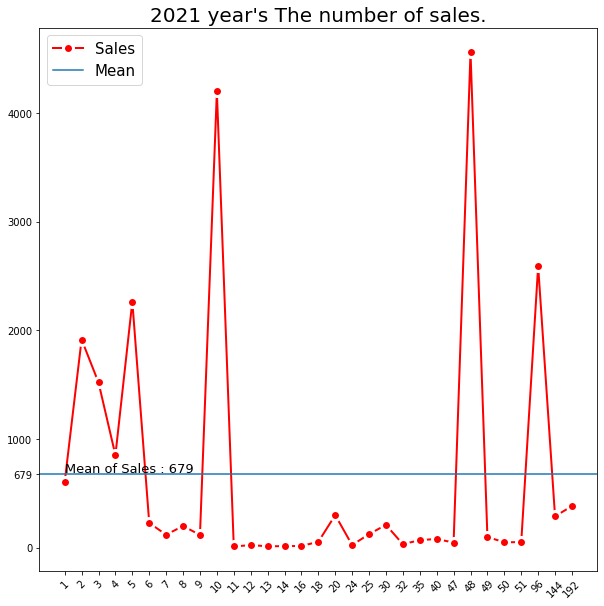

In [175]:
draw_linegraph(labels, ratio, int(np.mean(ratio)) , '2021')

In [23]:
# index +3이 엑셀 파일 위치
train1[train1['수량'] < 0].수량.index

Int64Index([139, 195, 220, 515, 516, 561, 562, 650, 685, 686, 1235, 1819], dtype='int64')

In [ ]:
 # index +3 + 이 엑셀 파일 위치
 train2[train2['수량'] < 0].수량.index

Int64Index([128, 788, 862, 864, 948, 990, 1096, 1214, 1231, 1242, 1409, 1458], dtype='int64')

In [26]:
daily_sales1 = train1.groupby('일자', as_index=False)['수량'].sum()
store_daily_sales1 = train1.groupby(['판매처명', '일자'], as_index=False)['수량'].sum()
item_daily_sales1 = train1.groupby(['품목코드', '일자'], as_index=False)['수량'].sum()

daily_sales2 = train2.groupby('일자', as_index=False)['수량'].sum()
store_daily_sales2 = train2.groupby(['판매처명', '일자'], as_index=False)['수량'].sum()
item_daily_sales2= train2.groupby(['품목코드', '일자'], as_index=False)['수량'].sum()

In [27]:
sum = [0,0,0,0,0,0,0,0,0,0,0,0,0]
for i in range(train1.판매월.size):
  for j in range(1, 13):
    if(train1.판매월[i] == j):
      sum[j] = sum[j]+train1.수량[i]

sum

[0, 792, 797, 848, 656, 686, 544, 679, 544, 639, 800, 761, 954]

In [28]:
sum2 = [0,0,0,0,0,0,0,0,0,0,0,0,0]
for i in range(train2.판매월.size):
  for j in range(1, 13):
    if(train2.판매월[i] == j):
      sum2[j] = sum2[j]+train2.수량[i]

sum2

[0, 861, 764, 899, 705, 2210, 892, 644, 735, 521, 958, 1214, 1963]

In [29]:
for i in range(1, len(sum)):
  if(i == 2):
    sum[i] = round(sum[i] / 29)
    sum2[i] = round(sum2[i] / 28)
  elif(i == 1 | 3 | 5 | 7 | 8 | 10 | 12):
    sum[i] = round(sum[i] / 31)
    sum2[i] = round(sum2[i] / 31)
  else:
    sum[i] = round(sum[i] / 30)
    sum2[i] = round(sum2[i] / 30)

In [30]:
sum

[0, 26, 27, 28, 22, 23, 18, 23, 18, 21, 27, 25, 32]

In [31]:
sum2

[0, 29, 27, 30, 24, 74, 30, 21, 24, 17, 32, 40, 65]

In [32]:
average2020 = pd.date_range('2020-01-01','2020-12-31',freq='D')
average2021 = pd.date_range('2021-01-01','2021-12-31',freq='D')

In [33]:
df2020 = pd.DataFrame(index=range(0,366), columns=['수량'])
df2021 = pd.DataFrame(index=range(0,365), columns=['수량'])

In [34]:
for i in range(366):
  if(i <= 31): df2020.수량[i] = sum[1]
  elif(i <= 60): df2020.수량[i] = sum[2]
  elif(i <= 91): df2020.수량[i] = sum[3]
  elif(i <= 121): df2020.수량[i] = sum[4]
  elif(i <= 152): df2020.수량[i] = sum[5]
  elif(i <= 182): df2020.수량[i] = sum[6]
  elif(i <= 213): df2020.수량[i] = sum[7]
  elif(i <= 244): df2020.수량[i] = sum[8]
  elif(i <= 274): df2020.수량[i] = sum[9]
  elif(i <= 305): df2020.수량[i] = sum[10]
  elif(i <= 335): df2020.수량[i] = sum[11]
  elif(i < 366): df2020.수량[i] = sum[12]

for i in range(365):
  if(i <= 31): df2021.수량[i] = sum2[1]
  elif(i <= 59): df2021.수량[i] = sum2[2]
  elif(i <= 90): df2021.수량[i] = sum2[3]
  elif(i <= 120): df2021.수량[i] = sum2[4]
  elif(i <= 151): df2021.수량[i] = sum2[5]
  elif(i <= 181): df2021.수량[i] = sum2[6]
  elif(i <= 212): df2021.수량[i] = sum2[7]
  elif(i <= 243): df2021.수량[i] = sum2[8]
  elif(i <= 273): df2021.수량[i] = sum2[9]
  elif(i <= 304): df2021.수량[i] = sum2[10]
  elif(i <= 334): df2021.수량[i] = sum2[11]
  elif(i < 365): df2021.수량[i] = sum2[12]

In [35]:
df2020.index = average2020
df2021.index = average2021
df2020.index.name='일자'
df2021.index.name='일자'

In [36]:
df2020 = df2020.reset_index()
df2021 = df2021.reset_index()

Text(0, 0.5, 'Sales')

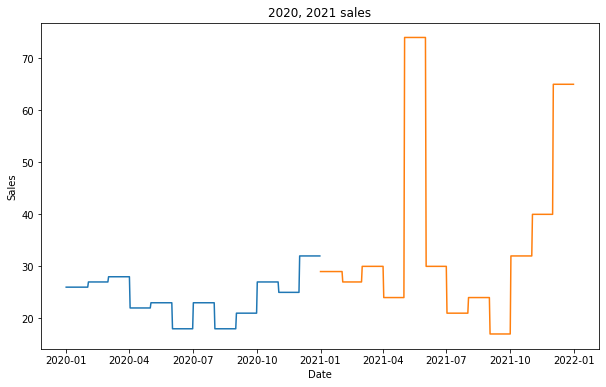

In [37]:
plt.figure(figsize=(10,6))
plt.plot(df2020['일자'], df2020['수량'])
plt.xlabel('Date')
plt.ylabel('Sales')

plt.plot(df2021['일자'], df2021['수량'])
plt.title('2020, 2021 sales')
plt.xlabel('Date')
plt.ylabel('Sales')

Text(0, 0.5, 'Sales')

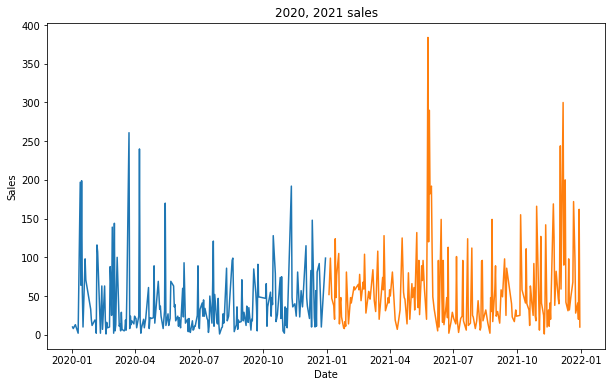

In [38]:
plt.figure(figsize=(10,6))
plt.plot(daily_sales1['일자'],daily_sales1['수량'])
plt.xlabel('Date')
plt.ylabel('Sales')

plt.plot(daily_sales2['일자'],daily_sales2['수량'])
plt.title('2020, 2021 sales')
plt.xlabel('Date')
plt.ylabel('Sales')

Text(0, 0.5, 'Sales')

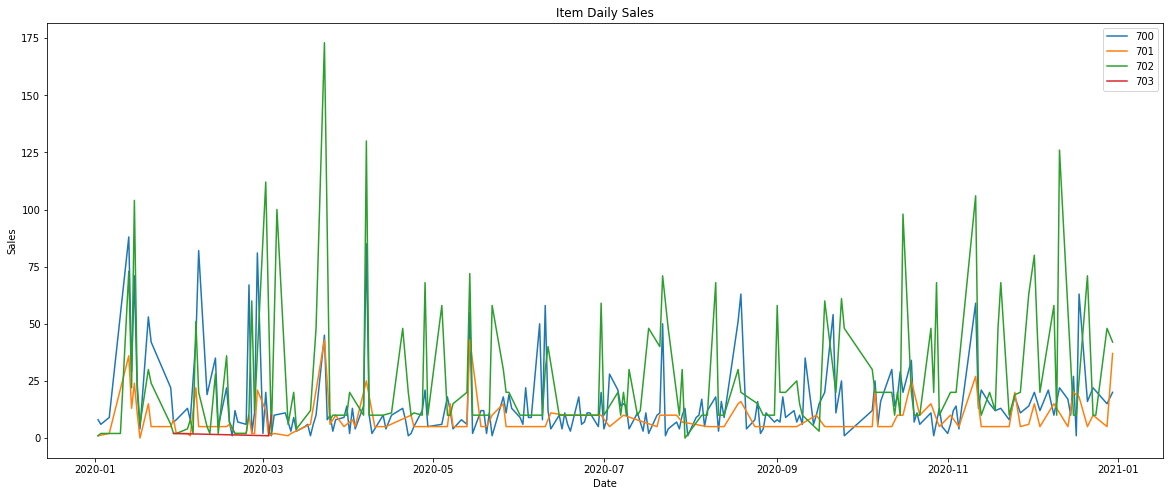

In [39]:
plt.figure(figsize=(20,8))

swap1 = item_daily_sales1.품목코드.unique()
for i in range(swap1.size) :
  for j in range(item_daily_sales1.품목코드.size) :
    if(item_daily_sales1.품목코드[j] == swap1[i]): 
       item_daily_sales1.품목코드[j] = i
       continue
       
for i in range(item_daily_sales1.품목코드.unique().size) :
    temp = item_daily_sales1[item_daily_sales1.품목코드==i]
    plt.plot(temp['일자'],temp['수량'], label='{}'.format(swap1[i]))

plt.legend()
plt.title('Item Daily Sales')
plt.xlabel('Date')
plt.ylabel('Sales')

Text(0, 0.5, 'Sales')

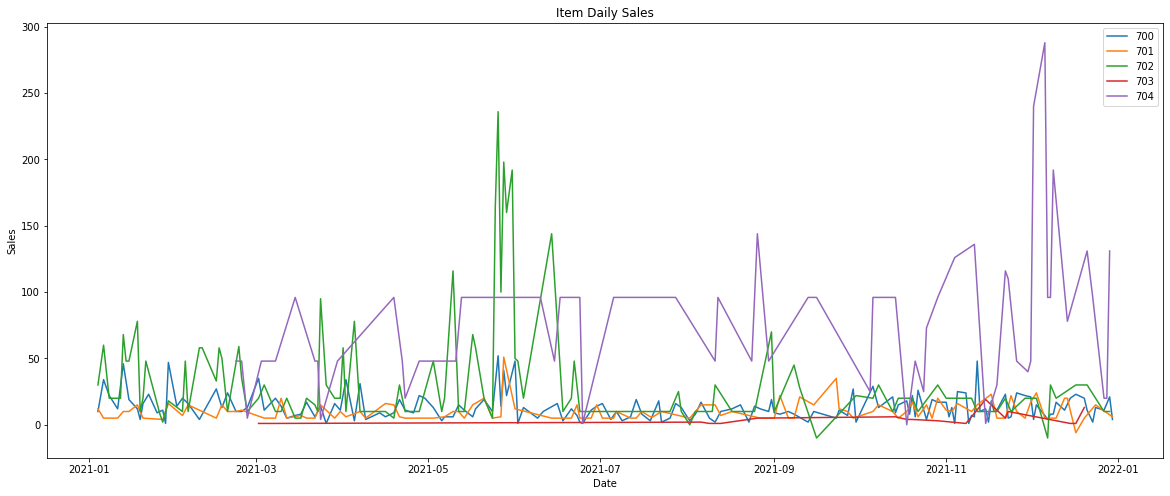

In [40]:
plt.figure(figsize=(20,8))

swap2 = item_daily_sales2.품목코드.unique()
for i in range(swap2.size) :
  for j in range(item_daily_sales2.품목코드.size) :
    if(item_daily_sales2.품목코드[j] == swap2[i]): 
       item_daily_sales2.품목코드[j] = i
       continue
       
for i in range(item_daily_sales2.품목코드.unique().size) :
    temp2 = item_daily_sales2[item_daily_sales2.품목코드==i]
    plt.plot(temp2['일자'],temp2['수량'], label='{}'.format(swap2[i]))

plt.legend()
plt.title('Item Daily Sales')
plt.xlabel('Date')
plt.ylabel('Sales')

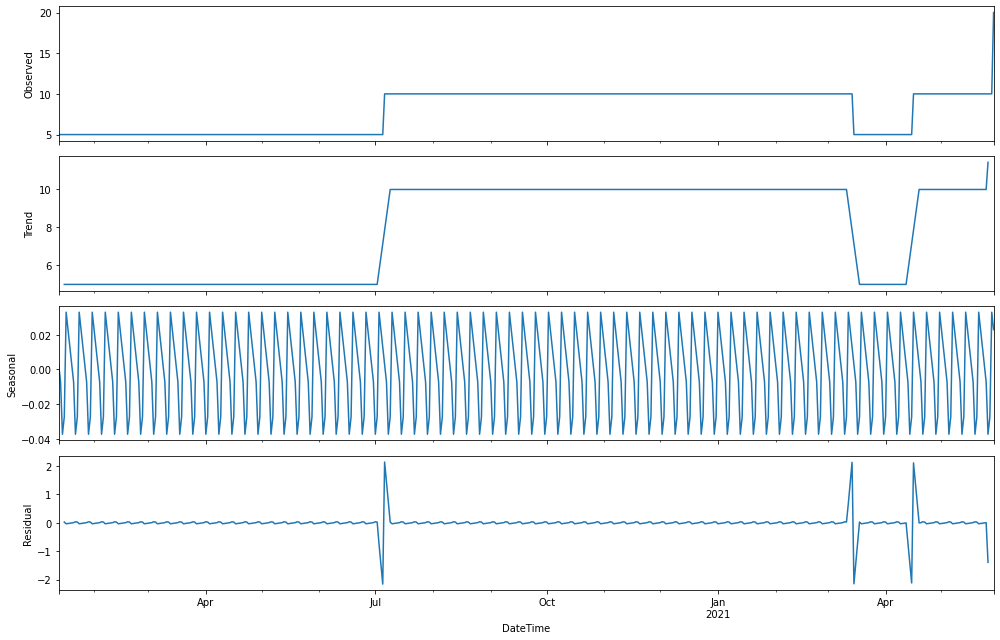

In [ ]:
# split data as trend + seasonal + residual
plt.rcParams['figure.figsize'] = (14, 9)
sm.tsa.seasonal_decompose(raw_01['수량'], model='additive').plot() 
plt.show()

# sm.tsa.seasonal_decompose는 계절성을 없애는 함수이며
# model = additive는 trend, seasonal, residual가 더히기(+)로 이루어져 있을 것이다라는 것이다.

In [ ]:
# 수치로 출력
result = sm.tsa.seasonal_decompose(raw_01['수량'], model='additive')
result.observed

DateTime
2020-01-13    5.00
2020-01-14    5.00
2020-01-15    5.00
2020-01-16    5.00
2020-01-17    5.00
              ... 
2021-05-25   10.00
2021-05-26   10.00
2021-05-27   10.00
2021-05-28   10.00
2021-05-29   20.00
Freq: D, Name: 수량, Length: 503, dtype: float64

In [ ]:
result.trend 
# trend에 nan이 있는데 실제로는 그게 아님
# trend를 만드려면 여러개가 있어야 하는데 초반과 끝부분은 그게 없어서 그렇기 때문

DateTime
2020-01-13     nan
2020-01-14     nan
2020-01-15     nan
2020-01-16    5.00
2020-01-17    5.00
              ... 
2021-05-25   10.00
2021-05-26   11.43
2021-05-27     nan
2021-05-28     nan
2021-05-29     nan
Freq: D, Name: 수량, Length: 503, dtype: float64

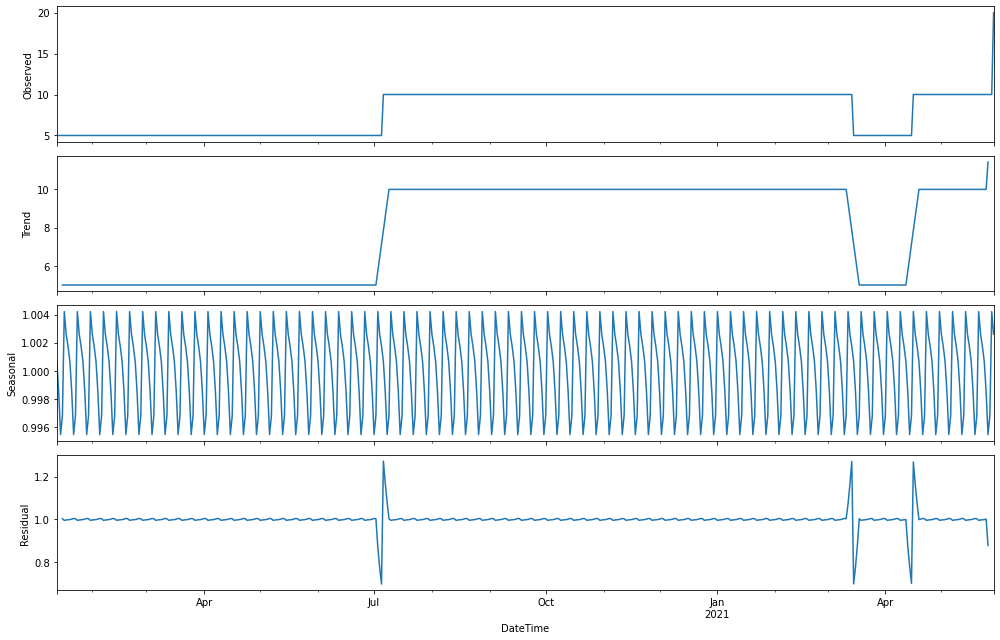

In [ ]:
# split data as trend * seasonal * residual
sm.tsa.seasonal_decompose(raw_01['수량'], model='multiplicative').plot() 
plt.show()

# model = multiplicative은 trend, seasonal, residual가 곱하기(*)로 이루어져 있을 것이다라는 것이다.
# 따라서 도메인의 특성에 따라 additive, multiplicative를 선택해야 한다.

In [ ]:
# fill nan as some values of data
result = sm.tsa.seasonal_decompose(raw_01['수량'], model='additive')
Y_trend = pd.DataFrame(result.trend)
Y_trend.fillna(method='ffill', inplace=True) #trend의 nan값 채우기(뒤에 있는 nam값들 앞 값드로 채우기)
Y_trend.fillna(method='bfill', inplace=True) #trend의 nan값 채우기(앞에 있는 nam값들 뒤 값들로 채우기)
Y_trend.columns = ['count_trend'] 

Y_seasonal = pd.DataFrame(result.seasonal)
Y_seasonal.fillna(method='ffill', inplace=True) #seasonal의 nan값 채우기(뒤에 있는 nam값들 앞 값드로 채우기)
Y_seasonal.fillna(method='bfill', inplace=True) #seasonal의 nan값 채우기(앞에 있는 nam값들 뒤 값들로 채우기)
Y_seasonal.columns = ['count_seasonal']

# merging several columns
raw_fin = pd.concat([raw_01, Y_trend, Y_seasonal], axis=1)
raw_fin

,일자,거래처계층그룹명,품목코드,품명 및 규격,수량,단가,공급가액,부가세,합 계,거래처코드,판매처명,창고명,적요(세금계산서),적요(의무사용량),count_trend,count_seasonal
DateTime,,,,,,,,,,,,,,,,
2020-01-13,2020-01-13,광주,702,CARGLE P(20L) [20L용기(말통)/10개이상 이용],5.00,"31,818","159,091","15,909","175,000",8968700528,[광주][기아오토큐] 월계점,본사,택배배송,(SN：463)매달 25일계산서 발행하면 바로결제,5.00,0.00
2020-01-14,2020-01-13,광주,702,CARGLE P(20L) [20L용기(말통)/10개이상 이용],5.00,"31,818","159,091","15,909","175,000",8968700528,[광주][기아오토큐] 월계점,본사,택배배송,(SN：463)매달 25일계산서 발행하면 바로결제,5.00,-0.01
2020-01-15,2020-01-15,광주,702,CARGLE P(20L) [20L용기(말통)/10개이상 이용],5.00,"31,818","159,091","15,909","175,000",8968700528,[광주][기아오토큐] 월계점,본사,택배배송,(SN：463)매달 25일계산서 발행하면 바로결제,5.00,-0.04
2020-01-16,2020-01-16,광주,702,CARGLE P(20L) [20L용기(말통)/10개이상 이용],5.00,"31,818","159,091","15,909","175,000",8968700528,[광주][기아오토큐] 월계점,본사,택배배송,(SN：463)매달 25일계산서 발행하면 바로결제,5.00,-0.03
2020-01-17,2020-01-16,광주,702,CARGLE P(20L) [20L용기(말통)/10개이상 이용],5.00,"31,818","159,091","15,909","175,000",8968700528,[광주][기아오토큐] 월계점,본사,택배배송,(SN：463)매달 25일계산서 발행하면 바로결제,5.00,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-05-25,2021-05-10,광주,702,CARGLE P(20L) [20L용기(말통)/10개이상 이용],10.00,"31,818","318,182","31,818","350,000",8968700528,[광주][기아오토큐] 월계점기아오토큐 주식회사,본사,택배발송,(SN：463)매달 25일계산서 발행하면 바로결제,10.00,-0.01
2021-05-26,2021-05-10,광주,702,CARGLE P(20L) [20L용기(말통)/10개이상 이용],10.00,"31,818","318,182","31,818","350,000",8968700528,[광주][기아오토큐] 월계점기아오토큐 주식회사,본사,택배발송,(SN：463)매달 25일계산서 발행하면 바로결제,11.43,-0.04
2021-05-27,2021-05-10,광주,702,CARGLE P(20L) [20L용기(말통)/10개이상 이용],10.00,"31,818","318,182","31,818","350,000",8968700528,[광주][기아오토큐] 월계점기아오토큐 주식회사,본사,택배발송,(SN：463)매달 25일계산서 발행하면 바로결제,11.43,-0.03


1주차 작업 끝 // 알게된 것: 일자로 시계열 분석을 할 때 일자가 하나만 있어야 한다. 이에따라 회사를 하나만 시계열 분석을 진행하였는데 수량이 너무 적어 다음에는 전체 엑셀을 하나의 날자로 수량만 모아서 사계열 분석을 실시할 예정.

In [ ]:
raw_rd = raw_rd.query('거래처계층그룹명 != "합계"')
raw_rd

,일자,거래처계층그룹명,품목코드,품명 및 규격,수량,단가,공급가액,부가세,합 계,거래처코드,판매처명,창고명,적요(세금계산서),적요(의무사용량)
DateTime,,,,,,,,,,,,,,
2020-01-02,2020-01-02,부천카포스ㆍ인천대리점소속,700,CARGLE P(20L) [20L용기(말통)/1~4개 이용],1,"34,545","34,545","3,455","38,000",3296900193,[부천][카포스]중앙자동차전문정비,본사,택배배송,(SN: 1257)
2020-01-02,2020-01-02,부천카포스ㆍ인천대리점소속,701,CARGLE P(20L) [20L용기(말통)/5~9개 이용],1,"34,545","34,545","3,455","38,000",1300455482,[부천][카포스]하이퍼자동차공업사,본사,택배배송,(SN 1292)
2020-01-02,2020-01-02,수원카포스,700,CARGLE P(20L) [20L용기(말통)/1~4개 이용],1,"34,545","34,545","3,455","38,000",1240326855,[수원][키포스]개벽카센터,본사,택배배송,(SN: 1280)
2020-01-02,2020-01-02,수원카포스,700,CARGLE P(20L) [20L용기(말통)/1~4개 이용],4,"34,545","138,180","13,820","152,000",1245173984,[수원][카포스]쌍용자동차 권선서비스프라자,본사,택배배송,(SN: 1311)
2020-01-02,2020-01-02,인천남동구ㆍ인천대리점소속ㆍ인천카포스,700,CARGLE P(20L) [20L용기(말통)/1~4개 이용],1,"35,454","35,454","3,546","39,000",1310650072,[인천][카포스]골드자동차공업사,본사,택배배송,(SN: 1260)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-31,2021-08-31,대리점,MKP000,SAVER P,16,"350,000","5,600,000","560,000","6,160,000",4130492816,[대리점]엠케이 충남총판(비앤비오토모티브),본사,서산 카이스트정비소 용차발송분,충남총판 tid 6850916
2021-08-31,2021-08-31,본사거래처,700,CARGLE P(20L) [20L용기(말통)/1~4개 이용],3,"42,727","128,182","12,818","141,000",5040877176,[대구광역시][하이카프라자]대구 침산점/청구스피드라인,로젠(부강),택배발송,(SN:1158)
2021-08-31,2021-08-31,본사거래처,700,CARGLE P(20L) [20L용기(말통)/1~4개 이용],3,"37,273","111,818","11,182","123,000",5050478355,[경상북도][현대블루핸즈]야사점,로젠(부강),택배발송,(SN：487)거래명세서 발송후 전화하기<br>계좌 : 우리은행 1005-503-4...


In [ ]:
# company_df=raw_rd.astype({'수량':int})
raw_rd['수량']=raw_rd['수량'].astype(int)
company_sum=raw_rd.groupby('일자').sum()[['수량']]
company_sum.asfreq('D').index #일별데이터로 바꿔줌
company_sum.asfreq('D').isnull().sum()
company_sum = company_sum.asfreq('D', method='ffill')
company_sum

,수량
일자,
2020-01-02,10
2020-01-03,9
2020-01-04,9
2020-01-05,9
2020-01-06,19
...,...
2021-08-27,16
2021-08-28,16
2021-08-29,16


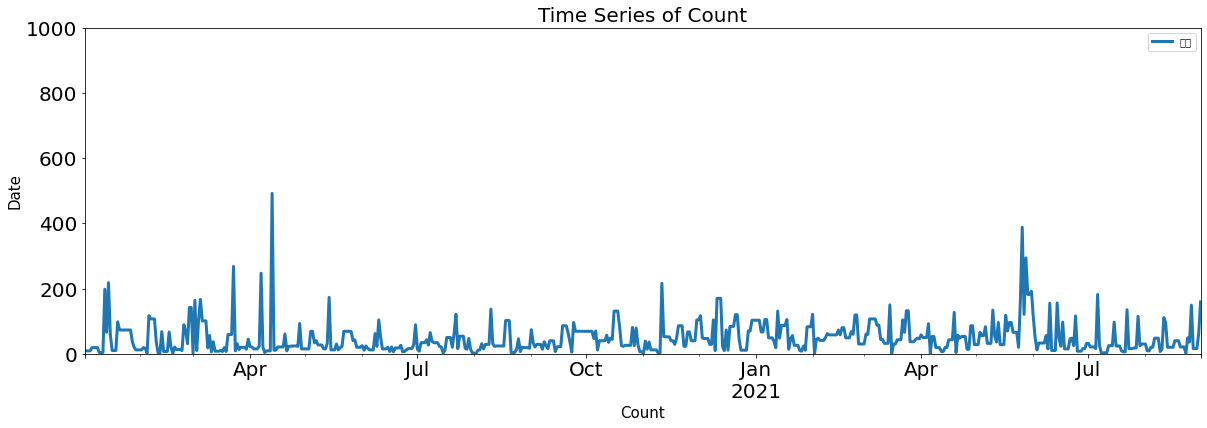

In [ ]:
# line plot of Y
company_sum['수량']=company_sum['수량'].astype(int)
company_sum[['수량']].plot(kind='line', figsize=(20,6), linewidth=3, fontsize=20, xlim=('2020-01-02', '2021-08-31'), ylim=(0,1000))
plt.title('Time Series of Count', fontsize=20)
plt.xlabel('Count', fontsize=15)
plt.ylabel('Date', fontsize=15)
plt.show()

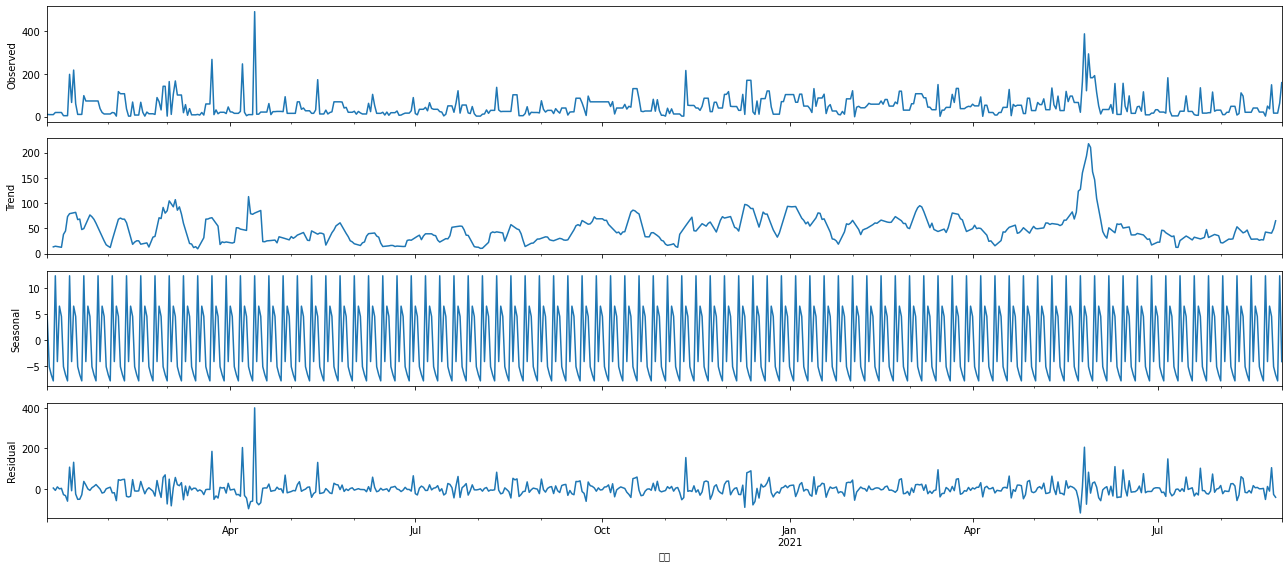

In [ ]:
plt.rcParams['figure.figsize'] = (18, 8)
sm.tsa.seasonal_decompose(company_sum['수량'], model='additive').plot() 
plt.show()

In [ ]:
result = sm.tsa.seasonal_decompose(company_sum['수량'], model='additive')
result.observed

일자
2020-01-02     10
2020-01-03      9
2020-01-04      9
2020-01-05      9
2020-01-06     19
             ... 
2021-08-27     16
2021-08-28     16
2021-08-29     16
2021-08-30     63
2021-08-31    159
Freq: D, Name: 수량, Length: 608, dtype: int64

In [ ]:
result.trend 

일자
2020-01-02     nan
2020-01-03     nan
2020-01-04     nan
2020-01-05   13.43
2020-01-06   14.71
              ... 
2021-08-27   49.29
2021-08-28   65.00
2021-08-29     nan
2021-08-30     nan
2021-08-31     nan
Freq: D, Name: 수량, Length: 608, dtype: float64

In [ ]:
#result = sm.tsa.seasonal_decompose(company_sum['수량'], model='multiplicative').plot() 0이랑 음수가 있어서 안된다
plt.show()

In [ ]:
# fill nan as some values of data
result = sm.tsa.seasonal_decompose(company_sum['수량'], model='additive')
Y_trend = pd.DataFrame(result.trend)
Y_trend.fillna(method='ffill', inplace=True) #trend의 nan값 채우기(뒤에 있는 nam값들 앞 값드로 채우기)
Y_trend.fillna(method='bfill', inplace=True) #trend의 nan값 채우기(앞에 있는 nam값들 뒤 값들로 채우기)
Y_trend.columns = ['count_trend'] 

Y_seasonal = pd.DataFrame(result.seasonal)
Y_seasonal.fillna(method='ffill', inplace=True) #seasonal의 nan값 채우기(뒤에 있는 nam값들 앞 값드로 채우기)
Y_seasonal.fillna(method='bfill', inplace=True) #seasonal의 nan값 채우기(앞에 있는 nam값들 뒤 값들로 채우기)
Y_seasonal.columns = ['count_seasonal']

# merging several columns
raw_fin = pd.concat([company_sum, Y_trend, Y_seasonal], axis=1)
raw_fin

,수량,count_trend,count_seasonal
일자,,,
2020-01-02,10,13.43,4.57
2020-01-03,9,13.43,-5.05
2020-01-04,9,13.43,-6.59
2020-01-05,9,13.43,-7.77
2020-01-06,19,14.71,12.36
...,...,...,...
2021-08-27,16,49.29,-5.05
2021-08-28,16,65.00,-6.59
2021-08-29,16,65.00,-7.77
